# Clasificación II

Ya hemos hablado que los problemas de clasificación son de los más solicitados en el _mundo real_, por lo que en esta clase veremos otro algoritmo de clasificación, pero en esta ocasión, uno no paramaétrico.

## K Nearest Neighbours

El algoritmo **k Nearest Neighbors (kNN)** es un método no paramétrico: una vez que el parámetro $k$ se ha fijado, no se busca obtener ningún parámetro adicional.

Sean los puntos $x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$  de etiqueta $y^{(i)}$ conocida, para $i=1, ..., m$.

El problema de clasificación consiste en encontrar la etiqueta de un nuevo punto $x=(x_1, ..., x_m)$ para el cual no conocemos la etiqueta.

![knn_example](https://cdn-images-1.medium.com/max/800/1*ZSN4cdbDzufJcUBieGUp7A.png)

[source](https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html)

La etiqueta de un punto se obtiene de la siguiente forma:
* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 

La idea es la siguiente:

![knn](https://cdn-images-1.medium.com/max/800/0*QmLAPLYUDcpJYwvo.png)

El modelo subyacente a kNN es el conjunto de entrenamiento completo. A diferencia de otros métodos que efectivamente generalizan y resumen la información (como regresión logística, por ejemplo), cuando se necesita realizar una predicción, el algoritmo kNN mira **todos** los datos y selecciona los k datos más cercanos, para regresar la etiqueta más popular/más común. Los datos no se resumen en parámetros, sino que siempre deben mantenerse en memoria. Es un método por tanto que no escala bien con un gran número de datos.

En caso de empate, existen diversas maneras de desempatar:
* Elegir la etiqueta del vecino más cercano (problema: no garantiza solución).
* Elegir la etiqueta de menor valor (problema: arbitrario).
* Elegir la etiqueta que se obtendría con $k+1$ o $k-1$ (problema: no garantiza solución, aumenta tiempo de cálculo).

La cercanía o similaridad entre los datos se mide de diversas maneras, pero en general depende del tipo de datos y del contexto.

* Para datos reales, puede utilizarse cualquier distancia, siendo la **distancia euclidiana** la más utilizada. También es posible ponderar unas componentes más que otras. Resulta conveniente normalizar para poder utilizar la noción de distancia más naturalmente.

* Para **datos categóricos o binarios**, suele utilizarse la [distancia de Hamming](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html).

A continuación, una implementación de _from scratch_ en numpy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def knn_search(X, k, x):
    """ find K nearest neighbours of data among D """
    # Distancia euclidiana
    d = np.linalg.norm(X - x, axis=1)
    # Ordenar por cercania
    idx = np.argsort(d)
    # Regresar los k mas cercanos
    id_closest = idx[:k] 
    return id_closest, d[id_closest].max()

def knn(X,Y,k,x):
    # Obtener los k mas cercanos
    k_closest, dmax = knn_search(X, k, x)
    # Obtener las etiquetas
    Y_closest = Y[k_closest]
    # Obtener la mas popular
    counts = np.bincount(Y_closest.flatten())
    # Regresar la mas popular (cualquiera, si hay empate)
    return np.argmax(counts), k_closest, dmax

def plot_knn(X, Y, k, x):
    y_pred, neig_idx, dmax = knn(X, Y, k, x)    
    # plotting the data and the input point
    fig = plt.figure(figsize=(8, 8))
    plt.plot(x[0, 0], x[0, 1], 'ok', ms=16)
    m_ob = Y[:, 0] == 0
    plt.plot(X[m_ob, 0], X[m_ob, 1], 'ob', ms=8)
    m_sr = Y[:,0] == 1
    plt.plot(X[m_sr, 0], X[m_sr, 1], 'sr', ms=8)

    # highlighting the neighbours
    plt.plot(X[neig_idx, 0], X[neig_idx, 1], 'o', markerfacecolor='None', markersize=24, markeredgewidth=1)

    # Plot a circle
    x_circle = dmax * np.cos(np.linspace(0, 2*np.pi, 360)) +  x[0, 0]
    y_circle = dmax * np.sin(np.linspace(0, 2*np.pi, 360)) +  x[0, 1]
    plt.plot(x_circle, y_circle, 'k', alpha=0.25)
    plt.show();

    # Print result
    if y_pred==0:
        print("Prediccion realizada para etiqueta del punto = {} (circulo azul)".format(y_pred))
    else:
        print("Prediccion realizada para etiqueta del punto = {} (cuadrado rojo)".format(y_pred))

Puedes ejecutar varias veces el código anterior, variando el número de vecinos `k` para ver cómo afecta el algoritmo.

In [3]:
k = 5  # hyper-parameter
N = 50
np.random.seed(42)

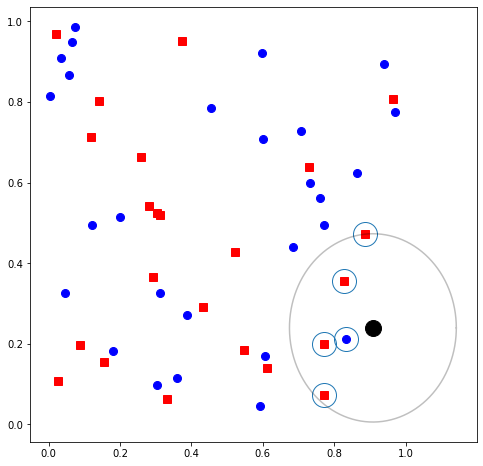

Prediccion realizada para etiqueta del punto = 1 (cuadrado rojo)


In [4]:
X = np.random.rand(N, 2) # random dataset
Y = np.array(np.random.rand(N) < 0.4, dtype=int).reshape(N, 1) # random dataset
x = np.random.rand(1, 2) # query point

# performing the search
plot_knn(X, Y, k, x)    

## Aplicación

In [5]:
import pandas as pd
from sklearn import datasets

Utilizaremos un dataset de dígitos escritos a mano para clasificar según el valor de los píxeles

In [6]:
# print(digits_dict["DESCR"])  # Descomenta la línea si quieren más info del dataset

In [7]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Para hacerlo un poco más gráfico, veamos la imagen del primer número

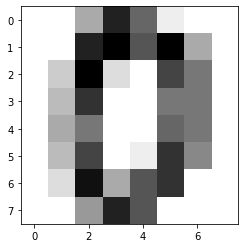

In [8]:
digit_images = datasets.load_digits().images

plt.imshow(digit_images[0], cmap=plt.cm.gray_r, interpolation='nearest');

Como (casi) siempre, Scikit-learn nos ofrece los algoritmos en la misma sintaxis a la que ya nos hemos ido acostumbrando.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(digits_X, digits_y)

KNeighborsClassifier()

¿Qué pasó? Veamos algún registro en particular

In [10]:
i = 0
digits_X.iloc[[i], :]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


Y su respectiva predicción

In [11]:
neigh.predict(digits_X.iloc[[i], :])

array([0])

In [12]:
neigh.predict_proba(digits_X.iloc[[i], :])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

¡No tiene ninguna gracia! Porque el elemento más cercano es él mismo! Adelantemos un poco de las clases siguientes

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.25, random_state=42)

Hagamos el ajuste solo con datos de entrenamiento

In [14]:
neigh_tt = KNeighborsClassifier(n_neighbors=k)
neigh_tt.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
i_test = 22

In [33]:
neigh_tt.predict(X_test.iloc[[i_test], :])

array([9])

In [34]:
neigh_tt.predict_proba(X_test.iloc[[i_test], :])

array([[0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.8]])

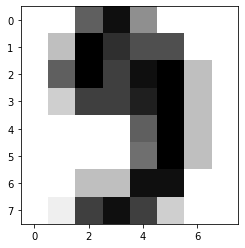

In [35]:
plt.imshow(X_test.iloc[[i_test], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');